In [48]:
import pandas as pd
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(11.7,8.27)})

<b>Legend:</b>
<hr>
<ul>
<li> <i>italics</i> are personal notes</li>
<li> plain text are scientific journal entries</li>
</ul>

<i>I have found a source of information reguarding hero's played and the overall professional</i>

<i>I had to reference older material to import this bad boy and now it is in my hands to mess with</i>

What does the data set look like?

In [2]:
#getting the data
df = acquire.get_map_data()
df

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,2,0
3,2018-01-11 00:40:27,2018-01-11 00:44:41,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,2,2
4,2018-01-11 00:46:09,2018-01-11 00:49:48,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11231,2021-09-26 01:57:42,2021-09-26 02:04:09,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,2,...,Atlanta Reign,Shanghai Dragons,70.287613,70.287613,93.260010,196.845001,NaN,NaN,3,3
11232,2021-09-26 02:05:35,2021-09-26 02:08:24,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,3,...,Atlanta Reign,Shanghai Dragons,9.008842,70.287613,0.000000,196.845001,NaN,NaN,5,3
11233,2021-09-26 02:09:50,2021-09-26 02:12:41,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,4,...,Atlanta Reign,Shanghai Dragons,9.014740,9.008842,25.285004,0.000000,NaN,NaN,6,5
11234,2021-09-26 02:53:59,2021-09-26 03:01:59,OWL 2021,37441,4,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,Havana,1,...,Shanghai Dragons,Atlanta Reign,55.211487,0.000000,0.000000,0.000000,NaN,NaN,2,0


<i>As far as where this is going I think it ought to be best that I drop the time aspect of it to build out my MVP</i>

<p>
What can I do with this data?
</p>

I will practice what I know most comfortable for me as far as machine learning tools go

For the time being I need to focus on filling in the information

In [3]:
#chopping off the time component
df_no_time = df.drop(columns=["round_start_time","round_end_time"])
df_no_time

,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,winning_team_final_map_score,losing_team_final_map_score,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,3,2,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,2,0
1,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,3,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,3,2
2,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,4,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,2,0
3,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,4,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,2,2
4,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,4,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11231,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,2,6,5,...,Atlanta Reign,Shanghai Dragons,70.287613,70.287613,93.260010,196.845001,NaN,NaN,3,3
11232,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,3,6,5,...,Atlanta Reign,Shanghai Dragons,9.008842,70.287613,0.000000,196.845001,NaN,NaN,5,3
11233,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,4,6,5,...,Atlanta Reign,Shanghai Dragons,9.014740,9.008842,25.285004,0.000000,NaN,NaN,6,5
11234,OWL 2021,37441,4,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,Havana,1,3,2,...,Shanghai Dragons,Atlanta Reign,55.211487,0.000000,0.000000,0.000000,NaN,NaN,2,0


Summary statistics

In [4]:
df_no_time.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,11236.0,25212.268067,10245.852391,10223.0,20316.0,21455.0,34812.000000,37448.000000
game_number,11236.0,2.604931,1.261433,1.0,2.0,3.0,4.000000,8.000000
map_round,11236.0,1.889729,0.952376,1.0,1.0,2.0,2.000000,7.000000
winning_team_final_map_score,11236.0,2.703631,1.102778,0.0,2.0,2.0,3.000000,8.000000
losing_team_final_map_score,11236.0,1.442328,1.289084,0.0,0.0,1.0,2.000000,7.000000
attacker_payload_distance,11236.0,29.902899,40.025959,0.0,0.0,0.0,70.297155,246.755112
defender_payload_distance,11236.0,18.781232,36.879487,0.0,0.0,0.0,0.000000,900.000000
attacker_time_banked,11236.0,46.001816,81.838631,0.0,0.0,0.0,62.956245,404.036987
defender_time_banked,11236.0,44.432948,87.336759,0.0,0.0,0.0,33.671021,415.794983
attacker_control_perecent,3331.0,78.070850,34.126400,0.0,61.0,99.0,100.000000,101.000000


Summary statistics by map

In [5]:
df_no_time.groupby("map_name").describe().T

map_name                        Blizzard World        Busan        Dorado  \
match_id                 count      436.000000    602.00000    414.000000   
                         mean     23613.683486  30089.95515  21979.632850   
                         std      10617.214960   6799.62996  10202.015431   
                         min      10336.000000  20304.00000  10223.000000   
                         25%      10485.750000  21388.00000  10540.750000   
...                                        ...          ...           ...   
defender_round_end_score min          0.000000      0.00000      0.000000   
                         25%          0.000000      0.00000      0.000000   
                         50%          1.000000      1.00000      0.000000   
                         75%          3.000000      1.00000      3.000000   
                         max          5.000000      2.00000      5.000000   

map_name                         Eichenwalde      Hanamura        Havana  \
match_id                 count    424.000000    699.000000    270.000000   
                         mean   26294.316038  26121.855508  29572.622222   
                         std     9792.312266  10813.490221   7225.149327   
                         min    10224.000000  10280.000000  20324.000000   
                         25%    21248.000000  13123.000000  21421.250000   
...                                      ...           ...           ...   
defender_round_end_score min        0.000000      0.000000      0.000000   
                         25%        0.000000      0.000000      0.000000   
                         50%        1.000000      1.000000      1.000000   
                         75%        3.000000      2.000000      3.000000   
                         max        6.000000      6.000000      6.000000   

map_name                           Hollywood  Horizon Lunar Colony  \
match_id                 count    402.000000            383.000000   
                         mean   25395.833333          17539.642298   
                         std     9489.787385           6911.665416   
                         min    10279.000000          10227.000000   
                         25%    21228.000000          10471.000000   
...                                      ...                   ...   
defender_round_end_score min        0.000000              0.000000   
                         25%        0.000000              0.000000   
                         50%        0.500000              2.000000   
                         75%        3.000000              2.000000   
                         max        6.000000              6.000000   

map_name                               Ilios    Junkertown  ...  \
match_id                 count    706.000000    414.000000  ...   
                         mean   24444.341360  21930.879227  ...   
                         std    10191.962917  10621.915888  ...   
                         min    10223.000000  10225.000000  ...   
                         25%    20302.000000  10371.000000  ...   
...                                      ...           ...  ...   
defender_round_end_score min        0.000000      0.000000  ...   
                         25%        0.000000      0.000000  ...   
                         50%        1.000000      2.000000  ...   
                         75%        1.000000      3.000000  ...   
                         max        2.000000      8.000000  ...   

map_name                        Lijiang Tower         Nepal       Numbani  \
match_id                 count     743.000000    607.000000    516.000000   
                         mean    25497.476447  24799.143328  24665.852713   
                         std     10803.513983  10893.532636  10803.815238   
                         min     10227.000000  10278.000000  10223.000000   
                         25%     10629.000000  10588.000000  10588.000000   
...                                       ...         

In [6]:
#between the 2 this one is more intuitive to read
df_no_time.groupby("map_name").match_id.describe()

,count,mean,std,min,25%,50%,75%,max
map_name,,,,,,,,
Blizzard World,436.0,23613.683486,10617.214960,10336.0,10485.75,21414.0,34625.75,37424.0
Busan,602.0,30089.955150,6799.629960,20304.0,21388.00,34191.5,35551.75,37431.0
Dorado,414.0,21979.632850,10202.015431,10223.0,10540.75,21268.0,31088.75,37446.0
Eichenwalde,424.0,26294.316038,9792.312266,10224.0,21248.00,30172.0,34811.25,37447.0
Hanamura,699.0,26121.855508,10813.490221,10280.0,13123.00,31058.0,37218.00,37444.0
Havana,270.0,29572.622222,7225.149327,20324.0,21421.25,34713.0,37219.25,37446.0
Hollywood,402.0,25395.833333,9489.787385,10279.0,21228.00,21441.0,34611.00,37414.0
Horizon Lunar Colony,383.0,17539.642298,6911.665416,10227.0,10471.00,21130.0,21357.00,31044.0
Ilios,706.0,24444.341360,10191.962917,10223.0,20302.00,21433.0,34767.50,37446.0


I am trying to build out my data dictionary that way i  have a comprehensive understanding of all of my features

In [7]:
dfnt = df_no_time

In [8]:
dfnt.stage.value_counts()

OWL 2020 Regular Season                           2835
OWL 2021                                          2155
Overwatch League Stage 1                           799
Overwatch League Stage 2                           759
Overwatch League Stage 3                           758
Overwatch League Stage 4                           741
Overwatch League - Stage 3                         627
Overwatch League - Stage 2                         627
Overwatch League - Stage 1                         615
Overwatch League - Stage 4                         607
Overwatch League 2019 Post-Season                  275
Overwatch League Inaugural Season Championship     103
Overwatch League Stage 3 Title Matches              84
Overwatch League Stage 1 Title Matches              81
Overwatch League Stage 2 Title Matches              71
Overwatch League - Stage 4 Title Matches            32
Overwatch League - Stage 2 Title Matches            23
Overwatch League - Stage 3 Title Matches            22
Overwatch 

What I want to ask of this is what times where these game types played in over the course of the year

In [9]:
df.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,2,0
3,2018-01-11 00:40:27,2018-01-11 00:44:41,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,2,2
4,2018-01-11 00:46:09,2018-01-11 00:49:48,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,4,2


In [10]:
df_start = pd.to_datetime(df.round_start_time)
df_start


0       2018-01-11 00:12:07
1       2018-01-11 00:22:05
2       2018-01-11 00:34:39
3       2018-01-11 00:40:27
4       2018-01-11 00:46:09
                ...        
11231   2021-09-26 01:57:42
11232   2021-09-26 02:05:35
11233   2021-09-26 02:09:50
11234   2021-09-26 02:53:59
11235   2021-09-26 03:03:30
Name: round_start_time, Length: 11236, dtype: datetime64[ns]

In [11]:
df_start[0]

Timestamp('2018-01-11 00:12:07')

The last recorded game of this dataset is 

2018-01-11 00:12:07

2021-09-26 03:03:30

This gives us roughly 3 years and 8 months of games that have been played

What I should be working on is understanding my data 

Which is what I am currently working on

What do the distribution of wins look like

In [12]:
dfnt.match_winner.value_counts()

San Francisco Shock       1014
New York Excelsior         884
Philadelphia Fusion        838
Los Angeles Gladiators     748
Shanghai Dragons           725
Seoul Dynasty              697
Los Angeles Valiant        602
Dallas Fuel                599
London Spitfire            562
Boston Uprising            508
Atlanta Reign              495
Houston Outlaws            493
Vancouver Titans           452
Hangzhou Spark             423
Guangzhou Charge           415
Paris Eternal              408
Chengdu Hunters            393
Florida Mayhem             380
Toronto Defiant            303
Washington Justice         297
Name: match_winner, dtype: int64

In [13]:
dfnt.match_winner.value_counts(normalize=True)

San Francisco Shock       0.090246
New York Excelsior        0.078676
Philadelphia Fusion       0.074582
Los Angeles Gladiators    0.066572
Shanghai Dragons          0.064525
Seoul Dynasty             0.062033
Los Angeles Valiant       0.053578
Dallas Fuel               0.053311
London Spitfire           0.050018
Boston Uprising           0.045212
Atlanta Reign             0.044055
Houston Outlaws           0.043877
Vancouver Titans          0.040228
Hangzhou Spark            0.037647
Guangzhou Charge          0.036935
Paris Eternal             0.036312
Chengdu Hunters           0.034977
Florida Mayhem            0.033820
Toronto Defiant           0.026967
Washington Justice        0.026433
Name: match_winner, dtype: float64

<AxesSubplot:>

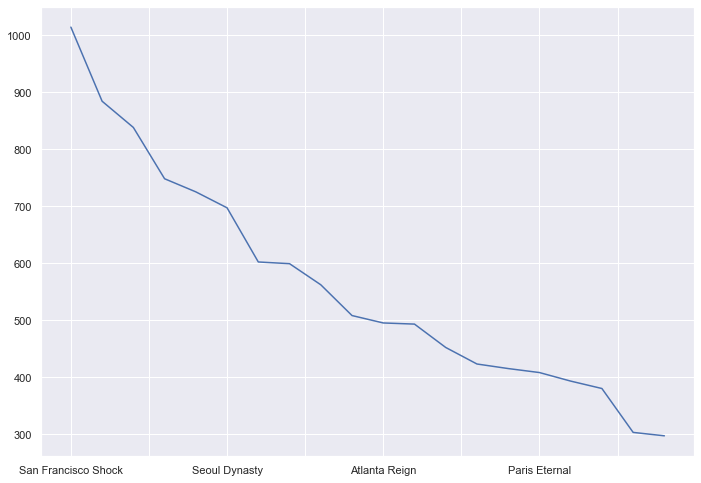

In [14]:
dfnt.match_winner.value_counts().plot()

<AxesSubplot:>

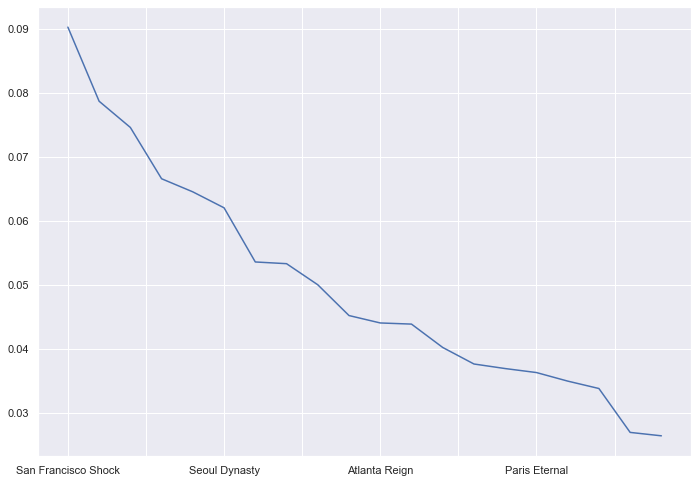

In [15]:
dfnt.match_winner.value_counts(normalize=True).plot()

In [16]:
dfnt.match_id.nunique()

1105

There were eleven thousand, two hundred and thirty-six matches played (11236)

The team that won the most is San Francisco Shock

Univariate visualizations are coming up next

<AxesSubplot:xlabel='losing_team_final_map_score', ylabel='winning_team_final_map_score'>

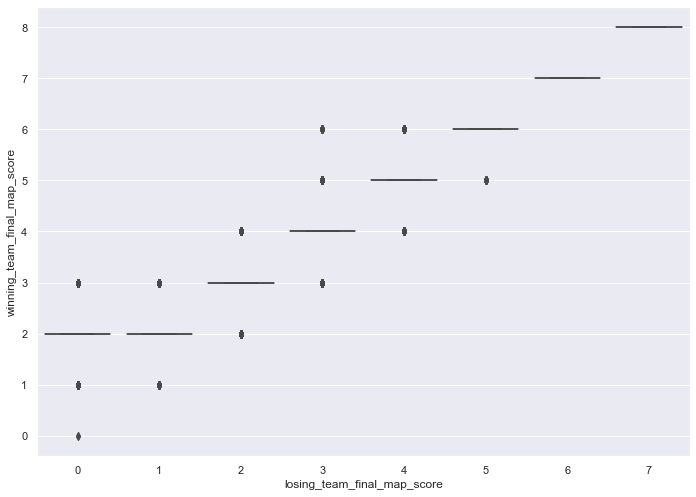

In [17]:
sns.boxplot(x="losing_team_final_map_score", y="winning_team_final_map_score", data=dfnt)

The formatting of the numbers should either all be integers or floats according to the type of feature.

# Prepare

In [18]:
dfnt.dtypes

stage                            object
match_id                          int64
game_number                       int64
match_winner                     object
map_winner                       object
map_loser                        object
map_name                         object
map_round                         int64
winning_team_final_map_score      int64
losing_team_final_map_score       int64
control_round_name               object
attacker                         object
defender                         object
team_one_name                    object
team_two_name                    object
attacker_payload_distance       float64
defender_payload_distance       float64
attacker_time_banked            float64
defender_time_banked            float64
attacker_control_perecent       float64
defender_control_perecent       float64
attacker_round_end_score          int64
defender_round_end_score          int64
dtype: object

In doing some of the initial searching I believe it would be best to split up my data set under the guise of time series analysis

In [19]:
df.dtypes

round_start_time                 object
round_end_time                   object
stage                            object
match_id                          int64
game_number                       int64
match_winner                     object
map_winner                       object
map_loser                        object
map_name                         object
map_round                         int64
winning_team_final_map_score      int64
losing_team_final_map_score       int64
control_round_name               object
attacker                         object
defender                         object
team_one_name                    object
team_two_name                    object
attacker_payload_distance       float64
defender_payload_distance       float64
attacker_time_banked            float64
defender_time_banked            float64
attacker_control_perecent       float64
defender_control_perecent       float64
attacker_round_end_score          int64
defender_round_end_score          int64


In [20]:
df.round_start_time = pd.to_datetime(df.round_start_time)

In [21]:
df.round_end_time = pd.to_datetime(df.round_end_time)

In [22]:
df.dtypes

round_start_time                datetime64[ns]
round_end_time                  datetime64[ns]
stage                                   object
match_id                                 int64
game_number                              int64
match_winner                            object
map_winner                              object
map_loser                               object
map_name                                object
map_round                                int64
winning_team_final_map_score             int64
losing_team_final_map_score              int64
control_round_name                      object
attacker                                object
defender                                object
team_one_name                           object
team_two_name                           object
attacker_payload_distance              float64
defender_payload_distance              float64
attacker_time_banked                   float64
defender_time_banked                   float64
attacker_cont

Okay now both of my times are set up in the date time format, now what?

Time to split the data into train validate test before i get any further

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11236 entries, 0 to 11235
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   round_start_time              11235 non-null  datetime64[ns]
 1   round_end_time                11236 non-null  datetime64[ns]
 2   stage                         11236 non-null  object        
 3   match_id                      11236 non-null  int64         
 4   game_number                   11236 non-null  int64         
 5   match_winner                  11236 non-null  object        
 6   map_winner                    11236 non-null  object        
 7   map_loser                     11236 non-null  object        
 8   map_name                      11236 non-null  object        
 9   map_round                     11236 non-null  int64         
 10  winning_team_final_map_score  11236 non-null  int64         
 11  losing_team_final_map_score 

Time to fill in the nulls

In [24]:
df.fillna(0)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,0.0,0.0,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,0.0,0.0,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,0.0,0.0,2,0
3,2018-01-11 00:40:27,2018-01-11 00:44:41,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,0.0,0.0,2,2
4,2018-01-11 00:46:09,2018-01-11 00:49:48,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,0.0,0.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11231,2021-09-26 01:57:42,2021-09-26 02:04:09,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,2,...,Atlanta Reign,Shanghai Dragons,70.287613,70.287613,93.260010,196.845001,0.0,0.0,3,3
11232,2021-09-26 02:05:35,2021-09-26 02:08:24,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,3,...,Atlanta Reign,Shanghai Dragons,9.008842,70.287613,0.000000,196.845001,0.0,0.0,5,3
11233,2021-09-26 02:09:50,2021-09-26 02:12:41,OWL 2021,37441,3,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,King's Row,4,...,Atlanta Reign,Shanghai Dragons,9.014740,9.008842,25.285004,0.000000,0.0,0.0,6,5
11234,2021-09-26 02:53:59,2021-09-26 03:01:59,OWL 2021,37441,4,Shanghai Dragons,Shanghai Dragons,Atlanta Reign,Havana,1,...,Shanghai Dragons,Atlanta Reign,55.211487,0.000000,0.000000,0.000000,0.0,0.0,2,0


Something immediatly that comes to mind is the fact that I can build out a feature which shows the difference in the start and end times.

- using this difference I will be able to determine game length

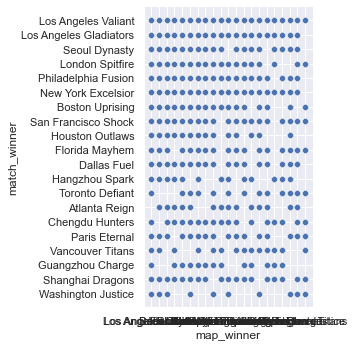

In [25]:
sns.relplot(data=df,x="map_winner",y="match_winner")
# find visualization of categorical data on categorical data
# catplots
# there learning take away from ryan is to check sns documentation tutorial

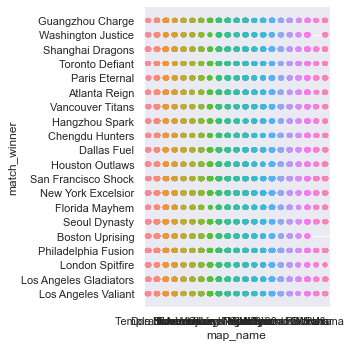

In [26]:
sns.catplot(data=df, y="match_winner", x="map_name")

In [27]:
# sns.catplot(data=df, hue=)

In [28]:
df.match_winner.value_counts()

San Francisco Shock       1014
New York Excelsior         884
Philadelphia Fusion        838
Los Angeles Gladiators     748
Shanghai Dragons           725
Seoul Dynasty              697
Los Angeles Valiant        602
Dallas Fuel                599
London Spitfire            562
Boston Uprising            508
Atlanta Reign              495
Houston Outlaws            493
Vancouver Titans           452
Hangzhou Spark             423
Guangzhou Charge           415
Paris Eternal              408
Chengdu Hunters            393
Florida Mayhem             380
Toronto Defiant            303
Washington Justice         297
Name: match_winner, dtype: int64

In [29]:
df[df.map_winner == df.map_loser]

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
29,2018-01-11 05:12:13,2018-01-11 05:20:16,Overwatch League - Stage 1,10225,4,Seoul Dynasty,draw,draw,Numbani,1,...,Seoul Dynasty,Dallas Fuel,71.792168,0.000000,0.000000,0.000000,NaN,NaN,3,0
30,2018-01-11 05:22:12,2018-01-11 05:30:30,Overwatch League - Stage 1,10225,4,Seoul Dynasty,draw,draw,Numbani,3,...,Seoul Dynasty,Dallas Fuel,71.795456,71.792168,60.000000,60.000000,NaN,NaN,3,3
31,2018-01-11 05:31:57,2018-01-11 05:33:09,Overwatch League - Stage 1,10225,4,Seoul Dynasty,draw,draw,Numbani,5,...,Seoul Dynasty,Dallas Fuel,0.000000,71.795456,0.000000,60.000000,NaN,NaN,3,3
32,2018-01-11 05:34:35,2018-01-11 05:35:44,Overwatch League - Stage 1,10225,4,Seoul Dynasty,draw,draw,Numbani,7,...,Seoul Dynasty,Dallas Fuel,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3,3
68,2018-01-13 00:52:09,2018-01-13 00:53:55,Overwatch League - Stage 1,10229,2,Los Angeles Valiant,draw,draw,Horizon Lunar Colony,1,...,Dallas Fuel,Los Angeles Valiant,0.000000,0.000000,373.929993,240.000000,NaN,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10956,2021-08-15 23:18:48,2021-08-15 23:24:07,OWL 2021,37422,2,Atlanta Reign,draw,draw,Volskaya Industries,4,...,Toronto Defiant,Atlanta Reign,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3,3
11181,2021-09-24 01:48:38,2021-09-24 01:54:20,OWL 2021,37446,2,San Francisco Shock,draw,draw,Temple of Anubis,1,...,Chengdu Hunters,San Francisco Shock,0.000000,0.000000,77.982025,0.000000,NaN,NaN,2,0
11182,2021-09-24 01:55:51,2021-09-24 01:59:27,OWL 2021,37446,2,San Francisco Shock,draw,draw,Temple of Anubis,2,...,Chengdu Hunters,San Francisco Shock,0.000000,0.000000,204.451996,77.982025,NaN,NaN,2,2
11183,2021-09-24 02:00:53,2021-09-24 02:03:06,OWL 2021,37446,2,San Francisco Shock,draw,draw,Temple of Anubis,3,...,Chengdu Hunters,San Francisco Shock,0.000000,0.000000,0.000000,204.451996,NaN,NaN,3,2


# df.team_one_name == "Seoul Dynasty", df.team_two_name == "Seoul Dynasty"

I am using this section of code to build out using my bias

In [30]:
df.head(3)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.0,NaN,NaN,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.0,NaN,NaN,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.0,NaN,NaN,2,0


In [56]:
df.attacker_payload_distance.max()
#I really do have to crack open this data for the juicy bits
#there is good information here

246.75511169433597

In [73]:
# df[df.attacker_payload_distance >= 180]
# df.DataFrame.drop()
# df.drop(df[df['Age'] < 25].index, inplace = True)
df.drop(df[df.attacker_payload_distance >= 140].index, inplace = True)

In [72]:
df[df.attacker_payload_distance >= 140]

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score


In [58]:
df.defender_payload_distance.max()
#900? that is not a possible distance


900.0

In [69]:
# df[df.defender_payload_distance >= 350]
df.drop(df[df.defender_payload_distance >= 350].index, inplace = True)

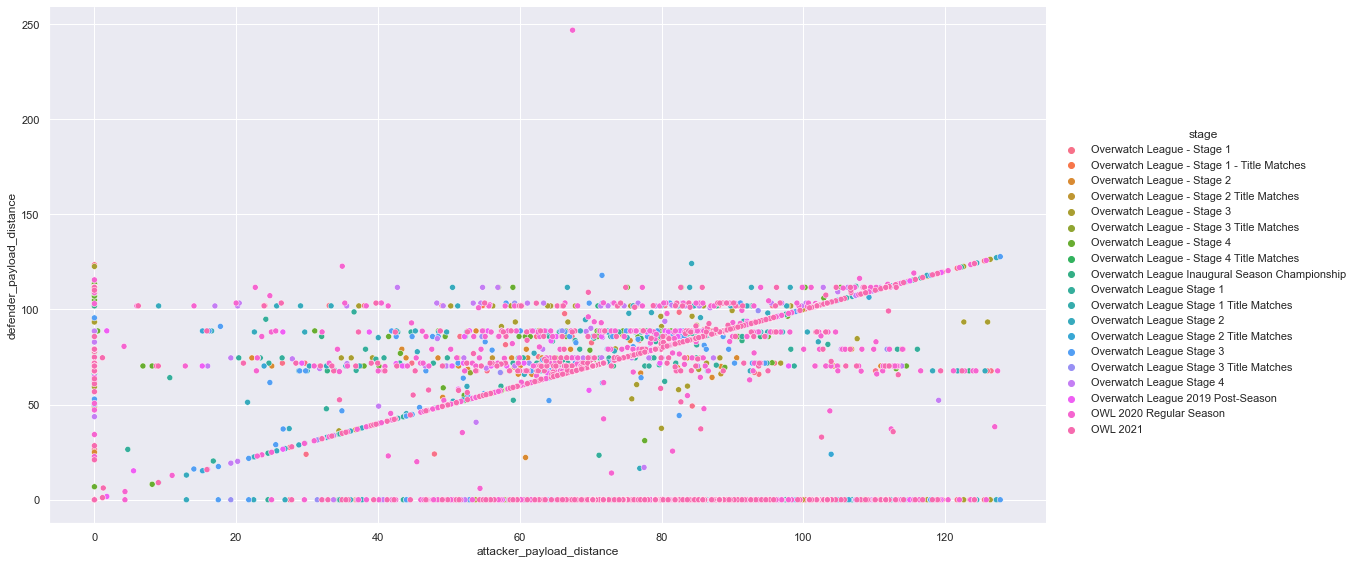

In [75]:
sns.relplot(x="attacker_payload_distance",y="defender_payload_distance",data=df,height=8, aspect=15/8, hue="stage")
# ,data=df[df.map_name == "King's Row"])

Takeaways: 
- There are some outliers that do not make sense in the context of game possibilities.
- I can shade them by team to performance

In [41]:
df[df.map_name == "King's Row"].describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,790.0,26431.706329,10151.473811,10278.0,21218.250000,30173.000000,35521.000000,37448.000000
game_number,790.0,2.549367,0.854107,1.0,2.000000,3.000000,3.000000,6.000000
map_round,790.0,1.930380,0.957375,1.0,1.000000,2.000000,2.000000,6.000000
winning_team_final_map_score,790.0,3.536709,1.255879,1.0,3.000000,3.000000,4.000000,8.000000
losing_team_final_map_score,790.0,2.351899,1.391706,0.0,1.000000,2.000000,3.000000,7.000000
attacker_payload_distance,790.0,56.094142,33.057354,0.0,36.243237,70.271164,70.295620,114.520943
defender_payload_distance,790.0,37.897569,36.329191,0.0,0.000000,51.792093,70.293081,113.755852
attacker_time_banked,790.0,61.461637,79.729865,0.0,0.000000,0.000000,113.971769,316.220978
defender_time_banked,790.0,44.360019,76.407208,0.0,0.000000,0.000000,66.675995,317.760010
attacker_control_perecent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df[df.map_name == "King's Row"].max()

round_start_time                     2021-09-26 02:09:50
round_end_time                       2021-09-26 02:12:41
stage                           Overwatch League Stage 4
match_id                                           37448
game_number                                            6
match_winner                          Washington Justice
map_winner                                          draw
map_loser                                           draw
map_name                                      King's Row
map_round                                              6
winning_team_final_map_score                           8
losing_team_final_map_score                            7
control_round_name                                  None
attacker                              Washington Justice
defender                              Washington Justice
team_one_name                         Washington Justice
team_two_name                         Washington Justice
attacker_payload_distance      

In [ ]:
df.relplot(x="attacker_payload_distance",y="defender_payload_distance",data=df)

I am going to concat all of these data set together instead of using inster statements

## Encoding Team played

In [ ]:
#feature engineering
df["SFS_played"] = (df.team_one_name == "San Francisco Shock") | (df.team_two_name == "San Francisco Shock")
df["NYE_played"] = (df.team_one_name == "New York Excelsior") | (df.team_two_name == "New York Excelsior")
df["PF_played"] = (df.team_one_name == "Philadelphia Fusion") | (df.team_two_name == "Philadelphia Fusion")
df["LAG_played"] = (df.team_one_name == "Los Angeles Gladiators") | (df.team_two_name == "Los Angeles Gladiators")
df["ShaD_played"] = (df.team_one_name == "Shanghai Dragons") | (df.team_two_name == "Shanghai Dragons")
df["SeoD_played"] = (df.team_one_name == "Seoul Dynasty") | (df.team_two_name == "Seoul Dynasty")
df["LAV_played"] = (df.team_one_name == "Los Angeles Valiant") | (df.team_two_name == "Los Angeles Valiant")
df["DF_played"] = (df.team_one_name == "Dallas Fuel") | (df.team_two_name == "Dallas Fuel")
df["LS_played"] = (df.team_one_name == "London Spitfire") | (df.team_two_name == "London Spitfire")
df["BU_played"] = (df.team_one_name == "Boston Uprising") | (df.team_two_name == "Boston Uprising")
df["AR_played"] = (df.team_one_name == "Atlanta Reign") | (df.team_two_name == "Atlanta Reign")
df["HO_played"] = (df.team_one_name == "Houston Outlaws") | (df.team_two_name == "Houston Outlaws")
df["VT_played"] = (df.team_one_name == "Vancouver Titans") | (df.team_two_name == "Vancouver Titans")
df["HS_played"] = (df.team_one_name == "Hangzhou Spark") | (df.team_two_name == "Hangzhou Spark")
df["GC_played"] = (df.team_one_name == "Guangzhou Charge") | (df.team_two_name == "Guangzhou Charge")
df["PE_played"] = (df.team_one_name == "Paris Eternal") | (df.team_two_name == "Paris Eternal")
df["CH_played"] = (df.team_one_name == "Chengdu Hunters") | (df.team_two_name == "Chengdu Hunters")
df["FM_played"] = (df.team_one_name == "Florida Mayhem") | (df.team_two_name == "Florida Mayhem")
df["TD_played"] = (df.team_one_name == "Toronto Defiant") | (df.team_two_name == "Toronto Defiant")
df["WJ_played"] = (df.team_one_name == "Washington Justice") | (df.team_two_name == "Washington Justice")
df.head()

s1 = pd.Series(['a', 'b'])

s2 = pd.Series(['c', 'd'])

pd.concat([s1, s2])

0    a

1    b

0    c

1    d

dtype: object

In [ ]:
# S1 = df["SFS_match_won"] = (df.match_winner == "San Francisco Shock")
# S2 = df["NYE_match_won"] = (df.match_winner == "New York Excelsior")
# S3 = df["PF_match_won"] = (df.match_winner == "Philadelphia Fusion")
# S4 = df["LAG_match_won"] = (df.match_winner == "Los Angeles Gladiators")
# S5 = df["ShaD_match_won"] = (df.match_winner == "Shanghai Dragons")
# S6 = df["SeoD_match_won"] = (df.match_winner == "Seoul Dynasty")
# S7 = df["LAV_match_won"] = (df.match_winner == "Los Angeles Valiant")
# S8 = df["DF_match_won"] = (df.match_winner == "Dallas Fuel")
# S9 = df["LS_match_won"] = (df.match_winner == "London Spitfire")
# S10 = df["BU_match_won"] = (df.match_winner == "Boston Uprising")
# S11 = df["AR_match_won"] = (df.match_winner == "Atlanta Reign")
# S12 = df["HO_match_won"] = (df.match_winner == "Houston Outlaws")
# S13 = df["VT_match_won"] = (df.match_winner == "Vancouver Titans")
# S14 = df["HS_match_won"] = (df.match_winner == "Hangzhou Spark")
# S15 = df["GC_match_won"] = (df.match_winner == "Guangzhou Charge")
# S16 = df["PE_match_won"] = (df.match_winner == "Paris Eternal")
# S17 = df["CH_match_won"] = (df.match_winner == "Chengdu Hunters")
# S18 = df["FM_match_won"] = (df.match_winner == "Florida Mayhem")
# S19 = df["TD_match_won"] = (df.match_winner == "Toronto Defiant")
# S20 = df["WJ_match_won"] = (df.match_winner == "Washington Justice")
# # df.head()
# df(pd.concat([S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20]))

In [ ]:
df["SFS_match_won"] = (df.match_winner == "San Francisco Shock")
df["NYE_match_won"] = (df.match_winner == "New York Excelsior")
df["PF_match_won"] = (df.match_winner == "Philadelphia Fusion")
df["LAG_match_won"] = (df.match_winner == "Los Angeles Gladiators")
df["ShaD_match_won"] = (df.match_winner == "Shanghai Dragons")
df["SeoD_match_won"] = (df.match_winner == "Seoul Dynasty")
df["LAV_match_won"] = (df.match_winner == "Los Angeles Valiant")
df["DF_match_won"] = (df.match_winner == "Dallas Fuel")
df["LS_match_won"] = (df.match_winner == "London Spitfire")
df["BU_match_won"] = (df.match_winner == "Boston Uprising")
df["AR_match_won"] = (df.match_winner == "Atlanta Reign")
df["HO_match_won"] = (df.match_winner == "Houston Outlaws")
df["VT_match_won"] = (df.match_winner == "Vancouver Titans")
df["HS_match_won"] = (df.match_winner == "Hangzhou Spark")
df["GC_match_won"] = (df.match_winner == "Guangzhou Charge")
df["PE_match_won"] = (df.match_winner == "Paris Eternal")
df["CH_match_won"] = (df.match_winner == "Chengdu Hunters")
df["FM_match_won"] = (df.match_winner == "Florida Mayhem")
df["TD_match_won"] = (df.match_winner == "Toronto Defiant")
df["WJ_match_won"] = (df.match_winner == "Washington Justice")
df.head()

In [ ]:
df["SFS_match_lost"] = (df.match_winner != "San Francisco Shock")
df["NYE_match_lost"] = (df.match_winner != "New York Excelsior")
df["PF_match_lost"] = (df.match_winner != "Philadelphia Fusion")
df["LAG_match_lost"] = (df.match_winner != "Los Angeles Gladiators")
df["ShaD_match_lost"] = (df.match_winner != "Shanghai Dragons")
df["SeoD_match_lost"] = (df.match_winner != "Seoul Dynasty")
df["LAV_match_lost"] = (df.match_winner != "Los Angeles Valiant")
df["DF_match_lost"] = (df.match_winner != "Dallas Fuel")
df["LS_match_lost"] = (df.match_winner != "London Spitfire")
df["BU_match_lost"] = (df.match_winner != "Boston Uprising")
df["AR_match_lost"] = (df.match_winner != "Atlanta Reign")
df["HO_match_lost"] = (df.match_winner != "Houston Outlaws")
df["VT_match_lost"] = (df.match_winner != "Vancouver Titans")
df["HS_match_lost"] = (df.match_winner != "Hangzhou Spark")
df["GC_match_lost"] = (df.match_winner != "Guangzhou Charge")
df["PE_match_lost"] = (df.match_winner != "Paris Eternal")
df["CH_match_lost"] = (df.match_winner != "Chengdu Hunters")
df["FM_match_lost"] = (df.match_winner != "Florida Mayhem")
df["TD_match_lost"] = (df.match_winner != "Toronto Defiant")
df["WJ_match_lost"] = (df.match_winner != "Washington Justice")
df.head()

In [ ]:
df["SFS_map_lost"] = (df.map_winner != "San Francisco Shock")
df["NYE_map_lost"] = (df.map_winner != "New York Excelsior")
df["PF_map_lost"] = (df.map_winner != "Philadelphia Fusion")
df["LAG_map_lost"] = (df.map_winner != "Los Angeles Gladiators")
df["ShaD_map_lost"] = (df.map_winner != "Shanghai Dragons")
df["SeoD_map_lost"] = (df.map_winner != "Seoul Dynasty")
df["LAV_map_lost"] = (df.map_winner != "Los Angeles Valiant")
df["DF_map_lost"] = (df.map_winner != "Dallas Fuel")
df["LS_map_lost"] = (df.map_winner != "London Spitfire")
df["BU_map_lost"] = (df.map_winner != "Boston Uprising")
df["AR_map_lost"] = (df.map_winner != "Atlanta Reign")
df["HO_map_lost"] = (df.map_winner != "Houston Outlaws")
df["VT_map_lost"] = (df.map_winner != "Vancouver Titans")
df["HS_map_lost"] = (df.map_winner != "Hangzhou Spark")
df["GC_map_lost"] = (df.map_winner != "Guangzhou Charge")
df["PE_map_lost"] = (df.map_winner != "Paris Eternal")
df["CH_map_lost"] = (df.map_winner != "Chengdu Hunters")
df["FM_map_lost"] = (df.map_winner != "Florida Mayhem")
df["TD_map_lost"] = (df.map_winner != "Toronto Defiant")
df["WJ_map_lost"] = (df.map_winner != "Washington Justice")
df.head()

Performance issues the message is telling me to use the .copy() function
new dataframe = old dataframe .copy()

## Map won encoded

In [ ]:
df["SFS_map_won"] = (df.map_winner == "San Francisco Shock")
df["NYE_map_won"] = (df.map_winner == "New York Excelsior")
df["PF_map_won"] = (df.map_winner == "Philadelphia Fusion")
df["LAG_map_won"] = (df.map_winner == "Los Angeles Gladiators")
df["ShaD_map_won"] = (df.map_winner == "Shanghai Dragons")
df["SeoD_map_won"] = (df.map_winner == "Seoul Dynasty")
df["LAV_map_won"] = (df.map_winner == "Los Angeles Valiant")
df["DF_map_won"] = (df.map_winner == "Dallas Fuel")
df["LS_map_won"] = (df.map_winner == "London Spitfire")
df["BU_map_won"] = (df.map_winner == "Boston Uprising")
df["AR_map_won"] = (df.map_winner == "Atlanta Reign")
df["HO_map_won"] = (df.map_winner == "Houston Outlaws")
df["VT_map_won"] = (df.map_winner == "Vancouver Titans")
df["HS_map_won"] = (df.map_winner == "Hangzhou Spark")
df["GC_map_won"] = (df.map_winner == "Guangzhou Charge")
df["PE_map_won"] = (df.map_winner == "Paris Eternal")
df["CH_map_won"] = (df.map_winner == "Chengdu Hunters")
df["FM_map_won"] = (df.map_winner == "Florida Mayhem")
df["TD_map_won"] = (df.map_winner == "Toronto Defiant")
df["WJ_map_won"] = (df.map_winner == "Washington Justice")
df.head()

In [ ]:
teams = ["San Francisco Shock",
"New York Excelsior",
"Philadelphia Fusion",
"Los Angeles Gladiators",
"Shanghai Dragons",
"Seoul Dynasty",
"Los Angeles Valiant",
"Dallas Fuel",
"London Spitfire",
"Boston Uprising",
"Atlanta Reign",
"Houston Outlaws",
"Vancouver Titans",
"Hangzhou Spark",
"Guangzhou Charge",
"Paris Eternal",
"Chengdu Hunters",
"Florida Mayhem",
"Toronto Defiant",
"Washington Justice"]

## Maps Encoded

In [ ]:
df["Volskaya"] = (df.map_name == "Volskaya Industries")
df["Kings_Row"] = (df.map_name == "King's Row")
df["Anubis"] = (df.map_name == "Temple of Anubis")
df["Lijiang"] = (df.map_name == "Lijiang Tower")
df["Ilios"] = (df.map_name == "Ilios")
df["Hanamura"] = (df.map_name == "Hanamura")
df["Oasis"] = (df.map_name == "Oasis")
df["Nepal"] = (df.map_name == "Nepal")
df["Busan"] = (df.map_name == "Busan")
df["Gibraltar"] = (df.map_name == "Watchpoint: Gibraltar")
df["Numbani"] = (df.map_name == "Numbani")
df["Blizzard World"] = (df.map_name == "Blizzard World")
df["Eichenwalde"] = (df.map_name == "Eichenwalde")
df["Dorado"] = (df.map_name == "Dorado")
df["Junkertown"] = (df.map_name == "Junkertown")
df["Route_66"] = (df.map_name == "Route 66")
df["Hollywood"] = (df.map_name == "Hollywood")
df["Horizon_Lunar_Colony"] = (df.map_name == "Horizon Lunar Colony")
df["Rialto"] = (df.map_name == "Rialto")
df["Havana"] = (df.map_name == "Havana")
df["Paris"] = (df.map_name == "Paris")
df.head()

In [ ]:
df["SFS_Offense"] = (df.attacker == "San Francisco Shock")
df["NYE_Offense"] = (df.attacker == "New York Excelsior")
df["PF_Offense"] = (df.attacker == "Philadelphia Fusion")
df["LAG_Offense"] = (df.attacker == "Los Angeles Gladiators")
df["ShaD_Offense"] = (df.attacker == "Shanghai Dragons")
df["SeoD_Offense"] = (df.attacker == "Seoul Dynasty")
df["LAV_Offense"] = (df.attacker == "Los Angeles Valiant")
df["DF_Offense"] = (df.attacker == "Dallas Fuel")
df["LS_Offense"] = (df.attacker == "London Spitfire")
df["BU_Offense"] = (df.attacker == "Boston Uprising")
df["AR_Offense"] = (df.attacker == "Atlanta Reign")
df["HO_Offense"] = (df.attacker == "Houston Outlaws")
df["VT_Offense"] = (df.attacker == "Vancouver Titans")
df["HS_Offense"] = (df.attacker == "Hangzhou Spark")
df["GC_Offense"] = (df.attacker == "Guangzhou Charge")
df["PE_Offense"] = (df.attacker == "Paris Eternal")
df["CH_Offense"] = (df.attacker == "Chengdu Hunters")
df["FM_Offense"] = (df.attacker == "Florida Mayhem")
df["TD_Offense"] = (df.attacker == "Toronto Defiant")
df["WJ_Offense"] = (df.attacker == "Washington Justice")
df.head()

In [ ]:
df["SFS_Defence"] = (df.defender == "San Francisco Shock")
df["NYE_Defence"] = (df.defender == "New York Excelsior")
df["PF_Defence"] = (df.defender == "Philadelphia Fusion")
df["LAG_Defence"] = (df.defender == "Los Angeles Gladiators")
df["ShaD_Defence"] = (df.defender == "Shanghai Dragons")
df["SeoD_Defence"] = (df.defender == "Seoul Dynasty")
df["LAV_Defence"] = (df.defender == "Los Angeles Valiant")
df["DF_Defence"] = (df.defender == "Dallas Fuel")
df["LS_Defence"] = (df.defender == "London Spitfire")
df["BU_Defence"] = (df.defender == "Boston Uprising")
df["AR_Defence"] = (df.defender == "Atlanta Reign")
df["HO_Defence"] = (df.defender == "Houston Outlaws")
df["VT_Defence"] = (df.defender == "Vancouver Titans")
df["HS_Defence"] = (df.defender == "Hangzhou Spark")
df["GC_Defence"] = (df.defender == "Guangzhou Charge")
df["PE_Defence"] = (df.defender == "Paris Eternal")
df["CH_Defence"] = (df.defender == "Chengdu Hunters")
df["FM_Defence"] = (df.defender == "Florida Mayhem")
df["TD_Defence"] = (df.defender == "Toronto Defiant")
df["WJ_Defence"] = (df.defender == "Washington Justice")
df.head()

In [ ]:
df["Seoul_win"] = df.match_winner == "Seoul Dynasty"
df.head()

In [ ]:
pd.DataFrame(df[df.Seoul_win == True]).sum()

In [ ]:
df.match_winner.value_counts()

In [ ]:
df.map_round()

# decision tree for model